In [20]:
# Este notebook está basado en material de Jake VanderPlas <vanderplas@astro.washington.edu>
# (License: BSD)

# ver también: https://jakevdp.github.io/blog/2012/09/12/dynamic-programming-in-python/

import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from astropy.visualization import hist

## Bayesian blocks

In [5]:
# draw a set of variables
np.random.seed(0)
t = np.concatenate([stats.cauchy(-5, 1.8).rvs(500),
                    stats.cauchy(-4, 0.8).rvs(2000),
                    stats.cauchy(-1, 0.3).rvs(500),
                    stats.cauchy(2, 0.8).rvs(1000),
                    stats.cauchy(4, 1.5).rvs(500)])

# truncate values to a reasonable range
t = t[(t > -15) & (t < 15)]

(array([  48.,   74.,  253., 1490.,  914.,  853.,  492.,  119.,   59.,
          21.]),
 array([-14.97136966, -12.0237102 ,  -9.07605075,  -6.12839129,
         -3.18073183,  -0.23307238,   2.71458708,   5.66224653,
          8.60990599,  11.55756545,  14.5052249 ]),
 <BarContainer object of 10 artists>)

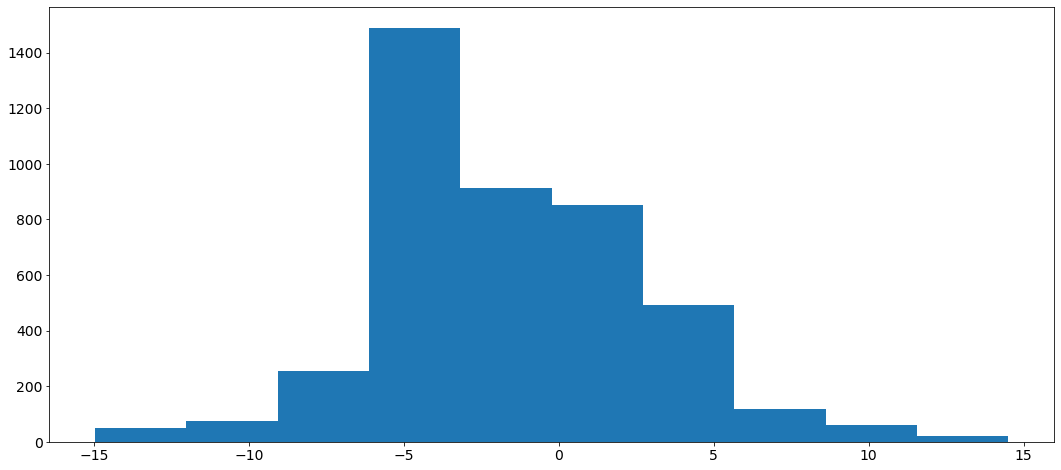

In [21]:
fig = plt.figure(figsize=(18, 8))
plt.hist(t)

Text(0, 0.5, 'P(t)')

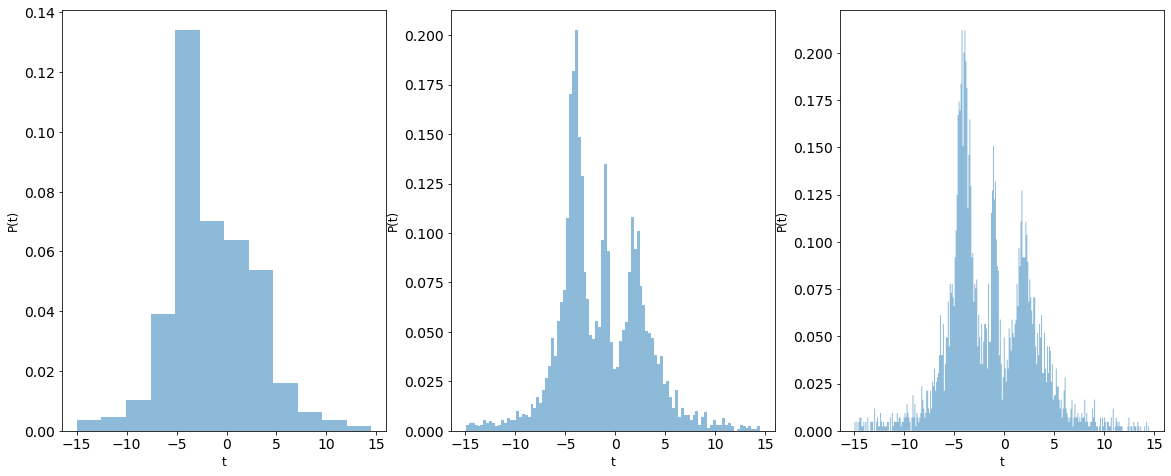

In [18]:
#------------------------------------------------------------
# First figure: show normal histogram binning
fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

ax1 = fig.add_subplot(131)
ax1.hist(t, bins=12, histtype='stepfilled', alpha=0.5, density=True)
ax1.set_xlabel('t')
ax1.set_ylabel('P(t)')

ax2 = fig.add_subplot(132)
ax2.hist(t, bins=100, histtype='stepfilled', alpha=0.5, density=True)
ax2.set_xlabel('t')
ax2.set_ylabel('P(t)')

ax3 = fig.add_subplot(133)
ax3.hist(t, bins=300, histtype='stepfilled', alpha=0.5, density=True)
ax3.set_xlabel('t')
ax3.set_ylabel('P(t)')

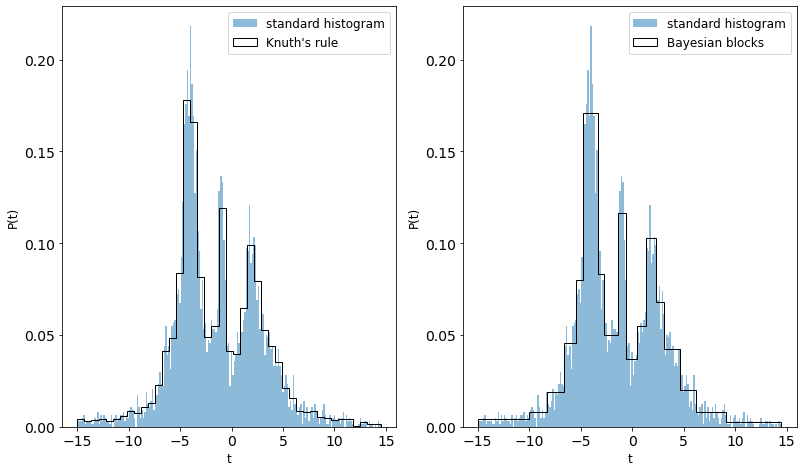

In [19]:
# Second & Third figure: Knuth bins & Bayesian Blocks

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

for bins, title, subplot in zip(['knuth', 'blocks'],
                                ["Knuth's rule", 'Bayesian blocks'],
                                [121, 122]):
    ax = fig.add_subplot(subplot)

    # plot a standard histogram in the background, with alpha transparency
    hist(t, bins=200, histtype='stepfilled',
         alpha=0.5, density=True, label='standard histogram')

    # plot an adaptive-width histogram on top
    hist(t, bins=bins, ax=ax, color='black',
         histtype='step', density=True, label=title)

    ax.legend(prop=dict(size=12))
    ax.set_xlabel('t')
    ax.set_ylabel('P(t)')

plt.show()